# Assignment Q2:
We want to fit a regression equation to the following data. 
But not sure of linear regression or polynomial regression. 
Try to fit linear regression and also non – linear regression. 
Write your observations / comments. Suggest the best model which fits the data.

| X | Y |
| --- | --- |
| 10 | 25 |
| 14 | 28 |
| 16 | 42 |
| 20 | 28 |
| 12 | 32 |
| 11 | 28 |

In [1]:
import statsmodels.api as sm
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns 
%matplotlib inline

In [2]:
df = pd.DataFrame([[10,25],[14,28],[16,42],[20,28],[12,32],[11,28]],columns=['x','y'])

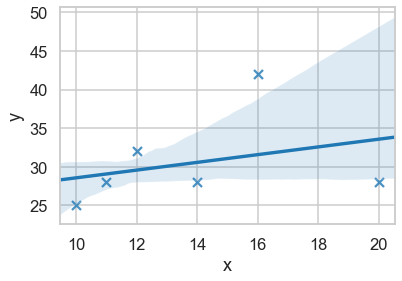

In [3]:
#Plot data assuming a linear regression model fit
sns.set_style('whitegrid')
sns.set_context('talk')
sns.regplot(x='x',y='y',data=df,marker="x",ci=68)
plt.show()

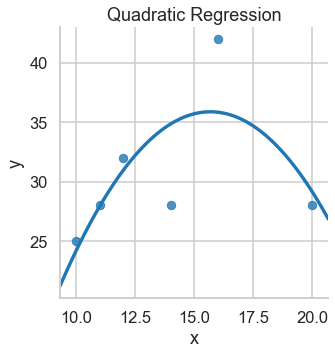

In [4]:
##Plot data assuming a Quadratic fit
g = sns.lmplot(x='x',y='y',data=df,ci=None,order=2,scatter_kws={"s":70})
g.ax.set_title('Quadratic Regression')
plt.show()

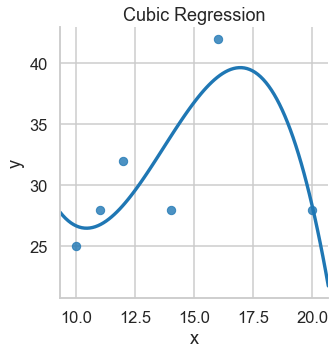

In [5]:
##Plot data assuming a Cubic fit
g = sns.lmplot(x='x',y='y',data=df,ci=None,order=3,scatter_kws={"s":70})
g.ax.set_title('Cubic Regression')
plt.show()

# Linear Regression Fit

In [17]:
X = np.array(df['x']).reshape((-1, 1))
y = np.array(df['y'])
model = LinearRegression()
model.fit(X, y)
r_sq = model.score(X, y)
print('coefficient of determination:', r_sq)
print('intercept:', model.intercept_)
print('slope:', model.coef_)
#Predict Value
y_pred_linear = model.predict(X)
from sklearn.metrics import mean_squared_error
rms_lin = mean_squared_error(y, y_pred_linear)
print ('linear model root mean squaare ',rms_lin)

coefficient of determination: 0.09423306569198599
intercept: 23.566585956416464
slope: [0.50121065]
linear model root mean squaare  27.701372074253428


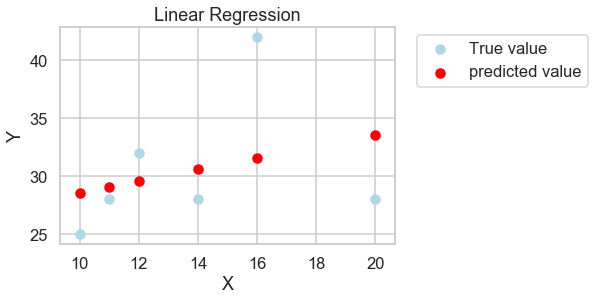

In [7]:
## Plot linear model
## True values in Blue
## Prediced values in RED
plt.scatter(df['x'], y, color = 'lightblue',label='True value') 
plt.scatter(X, model.predict(X), color = 'red',label='predicted value') 
plt.title('Linear Regression') 
plt.xlabel('X') 
plt.ylabel('Y') 
plt.legend(bbox_to_anchor=(1.04,1))
plt.show()

In [8]:
## function to calculate adjusted R-sqaure 
def adjusted_r2(r2,n,p):
    factor = (n-1)/(n-p-1)
    return (1 - (1-r2)*(1-r2)*factor)

# Quadratic Regression Fit
$$y = \beta_0 + \beta_1 * x + \beta_2 * x^2$$

In [9]:
## To implement Quadratic polynomial regression
from sklearn.preprocessing import PolynomialFeatures
x_ = PolynomialFeatures(degree=2, include_bias=False).fit_transform(X)
model_2 = LinearRegression().fit(x_, y)
r_sq = model_2.score(x_, y)
print('coefficient of determination:', r_sq)
print('intercept:', model_2.intercept_)
print('coefficients:', model_2.coef_)
#Predict Value
y_pred_poly = model_2.predict(x_)
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
rms_lin = mean_squared_error(y, y_pred_poly)
r2_score_quad = r2_score(y, y_pred_poly) 
print ('Polynomial regression quadratic  model rms',rms_lin)
print ('Polynomial regression quadratic  model R2 ',r2_score_quad)

coefficient of determination: 0.521013395220816
intercept: -52.94854434664873
coefficients: [11.32616791 -0.36103588]
Polynomial regression quadratic  model rms 14.649006996163378
Polynomial regression quadratic  model R2  0.521013395220816


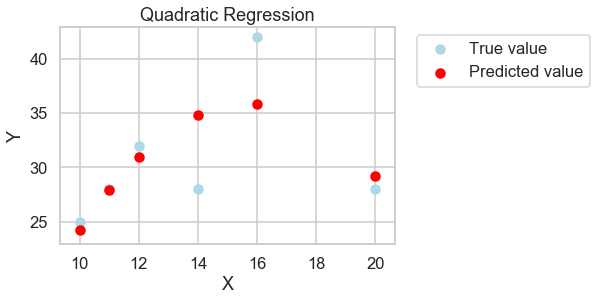

In [10]:
## Plot polynomial Quadratic model
## True values in Blue
## Prediced values in RED
from sklearn.metrics import r2_score
plt.scatter(X, y,color='lightblue',label='True value');
plt.scatter(X, y_pred_poly,color = 'red',label='Predicted value');
plt.title('Quadratic Regression') 
plt.xlabel('X') 
plt.ylabel('Y')
plt.legend(bbox_to_anchor=(1.04,1))
plt.show()

# Cublic Regression Fit
$$y = \beta_0 + \beta_1 * x + \beta_2 * x^2 + \beta_3 * x^3$$

In [11]:
## To implement Cubic polynomial regression
from sklearn.preprocessing import PolynomialFeatures
x_ = PolynomialFeatures(degree=3, include_bias=False).fit_transform(X)
model_3 = LinearRegression().fit(x_, y)
r_sq = model_3.score(x_, y)
print('coefficient of determination:', r_sq)
print('intercept:', model_3.intercept_)
print('coefficients:', model_3.coef_)
#Predict Value
y_pred_poly = model_3.predict(x_)
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
rms_lin = mean_squared_error(y, y_pred_poly)
r2_score_quad = r2_score(y, y_pred_poly) 
print ('Polynomial regression quadratic  model rms',rms_lin)
print ('Polynomial regression quadratic  model R2 ',r2_score_quad)

coefficient of determination: 0.6567610746578014
intercept: 236.29007271951997
coefficients: [-50.58231873   3.91475886  -0.09527856]
Polynomial regression quadratic  model rms 10.497390466715572
Polynomial regression quadratic  model R2  0.6567610746578014


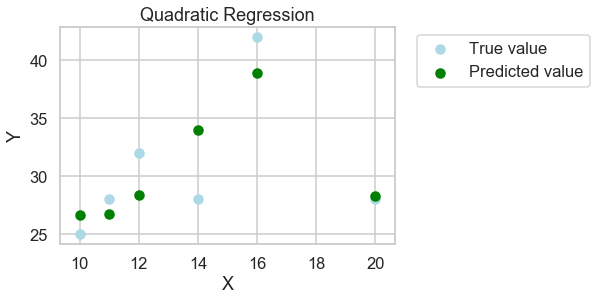

In [12]:
## Plot polynomial Cubic model
## True values in Blue
## Prediced values in Green
from sklearn.metrics import r2_score
plt.scatter(X, y,color='lightblue',label='True value');
plt.scatter(X, y_pred_poly,color = 'green',label='Predicted value');
plt.title('Quadratic Regression') 
plt.xlabel('X') 
plt.ylabel('Y')
plt.legend(bbox_to_anchor=(1.04,1))
plt.show()

# Observations

1. Quadratic Regression is a better fit than linear fit. (lower r-square :  0.521013395220816 )
2. Cubic Regression is a better fit than Quadratic fit.  (lower r-square :  0.6567610746578014)
3. However, looking at the curve of cubic regression , it falls more in the over fitting category)
4. Best Model fit is Quadratic Regression

In [13]:
## Observation
## 1. The data fits quadratic Regression better than simple linear regression.
## 2.
## 2. The predicted values in case of quadratic regression is much closer to true values.

In [14]:
### Adjusted R2 for quadratic regression 
adjusted_r2(r2_score_quad,6,2)

0.803645066883221